In [1]:
from astropy.io import fits
import numpy as np
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import astropy.units as u
from fil_finder import FilFinder2D #, Filament2D
from scipy.optimize import curve_fit
########################
import aplpy
import copy
import glob

In [5]:
d, bmaj = 10, 0.2706

# fits_pwd = "test_1_-50_-30.fits"
fits_pwd = "/home/filament/Documents/region1_hdr/V1_p150_m30.fits"
hdu = fits.open(fits_pwd)[0]
hdr1 = hdu.header

w = WCS(hdu)

In [7]:
fits_name = fits_pwd.split("/")[5]
fits_name

'V1_p150_m30.fits'

In [8]:
hdr1

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1298                                                  
NAXIS2  =                  999                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CTYPE1  = 'GLON-AIT'                                                            
CTYPE2  = 'GLAT-AIT'                                                            
CRVAL1  =             150.00

INFO: Auto-setting vmin to -6.044e+00 [aplpy.core]
INFO: Auto-setting vmax to  5.776e+01 [aplpy.core]


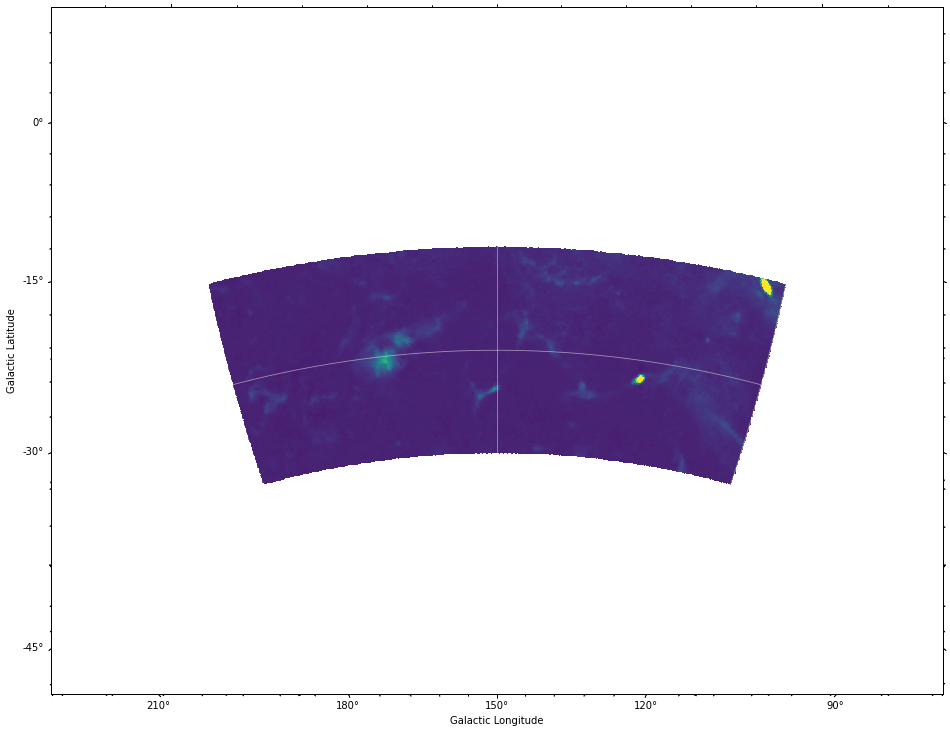

In [9]:
fig = plt.figure(figsize=(16,16))
f = aplpy.FITSFigure(hdu,figure=fig)
f.show_colorscale()
f.add_grid()
plt.show()

In [10]:
pa_deg_map = np.zeros(hdu.data.shape)
pa_deg_map.shape

(999, 1298)

In [13]:
for i in range(hdu.data.shape[0]):
    for j in range(hdu.data.shape[1]):
        if (i-500)**2 + (j-650)**2 <= 100**2:
            pa_deg_map[i][j] = 100
        else:
            pa_deg_map[i][j] = np.nan

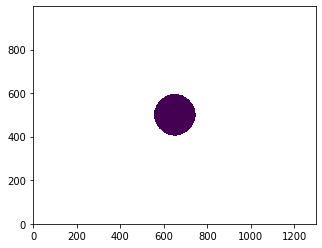

In [14]:
plt.imshow(pa_deg_map,origin="lower")

In [15]:
circle = fits.PrimaryHDU(pa_deg_map.astype('float32'),hdu.header)
circle.writeto("/home/filament/Documents/region1_hdr/V1_p150_m30_circle.fits",overwrite = True)

In [86]:
# fig = plt.figure(figsize=(16,16))
# f = aplpy.FITSFigure(circle,figure=fig)
# f.show_colorscale()
# f.add_grid()
# plt.show()

In [87]:
# pa_deg_map_1 = np.zeros(hdu.data.shape)

# for i in range(hdu.data.shape[1]):
#     for j in range(hdu.data.shape[0]):

#         pos = w.wcs_pix2world(i, j, 0)
#         if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
#             pa_deg_map_1[[j],[i]]=np.nan
#             continue
#         if pos[1] > 0:
#             pa_deg_map_1[[j],[i]]=np.nan

#         if (pos[1] <= 0):
#             if (pos[0] <= 180) and (pos[0] >= 120):
#                 pa_deg_map_1[[j],[i]] = hdu.data[[j],[i]]
#             else:
#                 pa_deg_map_1[[j],[i]] = np.nan
#         if (-40 > pos[1] >= -60):
#             pa_deg_map_1[[j],[i]]=np.nan

# region1_1 = fits.PrimaryHDU(pa_deg_map_1.astype('float32'),hdu.header)

In [88]:
# #region1
# pa_deg_map_1 = np.zeros(hdu.data.shape)

# for i in range(hdu.data.shape[1]):
#     for j in range(hdu.data.shape[0]):

#         pos = w.wcs_pix2world(i, j, 0)
#         if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
#             pa_deg_map_1[[j],[i]]=np.nan
#             continue
#         if pos[1] > 0:
#             pa_deg_map_1[[j],[i]]=np.nan

#         if (pos[1] <= 0):
#             if (pos[0] <= 180) and (pos[0] >= 120):
#                 pa_deg_map_1[[j],[i]] = hdu.data[[j],[i]]
#             else:
#                 pa_deg_map_1[[j],[i]] = np.nan
#         if (-40 >= pos[1] >= -60):
#             pa_deg_map_1[[j],[i]]=np.nan
#         if pos[1] > -20:
#             pa_deg_map_1[[j],[i]]=np.nan
# region1_1 = fits.PrimaryHDU(pa_deg_map_1.astype('float32'),hdu.header)

# pa_deg_map_1 = np.zeros(hdu.data.shape)

# for i in range(hdu.data.shape[1]):
#     for j in range(hdu.data.shape[0]):

#         pos = w.wcs_pix2world(i, j, 0)
#         if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
#             pa_deg_map_1[[j],[i]]=np.nan
#             continue
#         if pos[1] > 0:
#             pa_deg_map_1[[j],[i]]=np.nan

#         if (pos[1] <= 0):
#             if (pos[0] <= 120) and (pos[0] >= 60):
#                 pa_deg_map_1[[j],[i]] = hdu.data[[j],[i]]
#             else:
#                 pa_deg_map_1[[j],[i]] = np.nan
#         if (-40 >= pos[1] >= -60):
#             pa_deg_map_1[[j],[i]]=np.nan
#         if pos[1] > -20:
#             pa_deg_map_1[[j],[i]]=np.nan
# region1_2 = fits.PrimaryHDU(pa_deg_map_1.astype('float32'),hdu.header)

# pa_deg_map_1 = np.zeros(hdu.data.shape)

# for i in range(hdu.data.shape[1]):
#     for j in range(hdu.data.shape[0]):

#         pos = w.wcs_pix2world(i, j, 0)
#         if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
#             pa_deg_map_1[[j],[i]]=np.nan
#             continue
#         if pos[1] > 0:
#             pa_deg_map_1[[j],[i]]=np.nan

#         if (pos[1] <= 0):
#             if (pos[0] <= 180) and (pos[0] >= 120):
#                 pa_deg_map_1[[j],[i]] = hdu.data[[j],[i]]
#             else:
#                 pa_deg_map_1[[j],[i]] = np.nan
#         if (pos[1] > -40):
#             pa_deg_map_1[[j],[i]]=np.nan
            
#         if pos[1] > -20:
#             pa_deg_map_1[[j],[i]]=np.nan
# region1_3 = fits.PrimaryHDU(pa_deg_map_1.astype('float32'),hdu.header)

# pa_deg_map_1 = np.zeros(hdu.data.shape)

# for i in range(hdu.data.shape[1]):
#     for j in range(hdu.data.shape[0]):

#         pos = w.wcs_pix2world(i, j, 0)
#         if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
#             pa_deg_map_1[[j],[i]]=np.nan
#             continue
#         if pos[1] > 0:
#             pa_deg_map_1[[j],[i]]=np.nan

#         if (pos[1] <= 0):
#             if (pos[0] <= 120) and (pos[0] >= 60):
#                 pa_deg_map_1[[j],[i]] = hdu.data[[j],[i]]
#             else:
#                 pa_deg_map_1[[j],[i]] = np.nan
#         if (pos[1] > -40):
#             pa_deg_map_1[[j],[i]]=np.nan
            
#         if pos[1] > -20:
#             pa_deg_map_1[[j],[i]]=np.nan
# region1_4 = fits.PrimaryHDU(pa_deg_map_1.astype('float32'),hdu.header)

In [89]:
# region1 = fits.PrimaryHDU(pa_deg_map_1.astype('float32'),hdu.header)

In [90]:
# region1_1.writeto("/home/filament/Downloads/itijitekinayatu/region_1_V2_1.fits",overwrite=True)
# region1_2.writeto("/home/filament/Downloads/itijitekinayatu/region_1_V2_2.fits",overwrite=True)
# region1_3.writeto("/home/filament/Downloads/itijitekinayatu/region_1_V2_3.fits",overwrite=True)
# region1_4.writeto("/home/filament/Downloads/itijitekinayatu/region_1_V2_4.fits",overwrite=True)

In [91]:
# fig = plt.figure(figsize=(16,16))
# f = aplpy.FITSFigure(region1_4,figure=fig)
# f.show_colorscale()
# f.add_grid()
# plt.show()

In [92]:
#region1
pa_deg_map_1 = np.zeros(hdu.data.shape)
for i in range(hdu.data.shape[1]):
    for j in range(hdu.data.shape[0]):

        pos = w.wcs_pix2world(i, j, 0)
        if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
            pa_deg_map_1[[j],[i]]=np.nan
            continue
        if pos[1] > 0:
            pa_deg_map_1[[j],[i]]=np.nan

        if (pos[1] <= 0):
            if (pos[0] <= 180) and (pos[0] >= 60):
                pa_deg_map_1[[j],[i]] = hdu.data[[j],[i]]
            else:
                pa_deg_map_1[[j],[i]] = np.nan
        if (pos[1] < -60):
            pa_deg_map_1[[j],[i]]=np.nan
            
        if (pos[1] > -20):
            pa_deg_map_1[[j],[i]]=np.nan
if np.isnan(np.nanmax(pa_deg_map_1))==True:
    #region1
    pa_deg_map_1 = np.zeros(hdu.data.shape)
    for i in range(hdu.data.shape[1]):
        for j in range(hdu.data.shape[0]):

            pos = w.wcs_pix2world(i, j, 0)
            if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                pa_deg_map_1[[j],[i]]=np.nan
                continue
            if pos[1] > 0:
                pa_deg_map_1[[j],[i]]=np.nan

            if (pos[1] <= 0):
                if (pos[0]+360 <= 180) and (pos[0]+360 >= 60):
                    pa_deg_map_1[[j],[i]] = hdu.data[[j],[i]]
                else:
                    pa_deg_map_1[[j],[i]] = np.nan
            if (pos[1] < -60):
                pa_deg_map_1[[j],[i]]=np.nan
                
            if (pos[1] > -20):
                pa_deg_map_1[[j],[i]]=np.nan

In [93]:
fits_name

'test_1_70_100.fits'

In [94]:
region1 = fits.PrimaryHDU(pa_deg_map_1.astype('float32'),hdu.header)
region1.writeto("/home/filament/Desktop/fil_result/integ_fits/region1/"+fits_name,overwrite=True)

INFO: Auto-setting vmin to -1.200e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.526e+00 [aplpy.core]


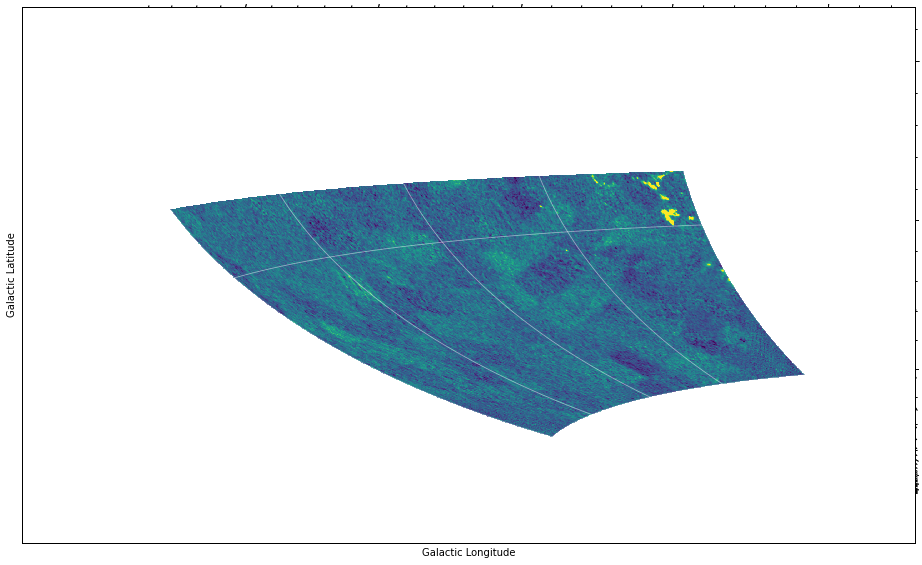

In [95]:
fig = plt.figure(figsize=(16,16))
f = aplpy.FITSFigure(region1,figure=fig)
f.show_colorscale()
f.add_grid()
plt.show()

In [15]:
np.isnan(np.nanmax(pa_deg_map_1))==True
# np.nanmin(pa_deg_map_1)

/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: All-NaN slice encountered
  """Entry point for launching an IPython kernel.


True

In [22]:
#region2
pa_deg_map_2 = np.zeros(hdu.data.shape)
for i in range(hdu.data.shape[1]):
    for j in range(hdu.data.shape[0]):

        pos = w.wcs_pix2world(i, j, 0)
        if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
            pa_deg_map_2[[j],[i]]=np.nan
            continue
        if pos[1] > 0:
            pa_deg_map_2[[j],[i]]=np.nan

        if pos[1] <= 0:
            if (pos[0] <= 300) and (pos[0] >= 180):
                pa_deg_map_2[[j],[i]] = hdu.data[[j],[i]]
            else:
                pa_deg_map_2[[j],[i]] = np.nan
        if (pos[1] < -60):
            pa_deg_map_2[[j],[i]]=np.nan
            
if np.isnan(np.nanmax(pa_deg_map_2)) == True:
    pa_deg_map_2 = np.zeros(hdu.data.shape)
    for i in range(hdu.data.shape[1]):
        for j in range(hdu.data.shape[0]):

            pos = w.wcs_pix2world(i, j, 0)
            if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                pa_deg_map_2[[j],[i]]=np.nan
                continue
            if pos[1] > 0:
                pa_deg_map_2[[j],[i]]=np.nan

            if pos[1] <= 0:
                if (pos[0] +360 <= 300) and (pos[0] +360 >= 180):
                    pa_deg_map_2[[j],[i]] = hdu.data[[j],[i]]
                else:
                    pa_deg_map_2[[j],[i]] = np.nan
            if (pos[1] < -60):
                pa_deg_map_2[[j],[i]]=np.nan

/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN slice encountered


In [ ]:
region2 = fits.PrimaryHDU(pa_deg_map_2.astype('float32'),hdu.header)
region2.writeto("/home/filament/Desktop/fil_result/integ_fits/region2/"+fits_name,overwrite=True)

In [23]:
#region3
pa_deg_map_3 = np.zeros(hdu.data.shape)
for i in range(hdu.data.shape[1]):
    for j in range(hdu.data.shape[0]):

        pos = w.wcs_pix2world(i, j, 0)
        if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
            pa_deg_map_3[[j],[i]]=np.nan
            continue
        if pos[1] < 0:
            pa_deg_map_3[[j],[i]]=np.nan

        if pos[1] >= 0:
            if (pos[0] <= 180) and (pos[0] >= 60):
                pa_deg_map_3[[j],[i]] = hdu.data[[j],[i]]
            else:
                pa_deg_map_3[[j],[i]] = np.nan
        if pos[1] > 60:
            pa_deg_map_3[[j],[i]] = np.nan
            
if np.isnan(np.nanmax(pa_deg_map_3)) == True:
    pa_deg_map_3 = np.zeros(hdu.data.shape)
    for i in range(hdu.data.shape[1]):
        for j in range(hdu.data.shape[0]):

            pos = w.wcs_pix2world(i, j, 0)
            if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                pa_deg_map_3[[j],[i]]=np.nan
                continue
            if pos[1] < 0:
                pa_deg_map_3[[j],[i]]=np.nan

            if pos[1] >= 0:
                if (pos[0] +360 <= 180) and (pos[0] +360 >= 60):
                    pa_deg_map_3[[j],[i]] = hdu.data[[j],[i]]
                else:
                    pa_deg_map_3[[j],[i]] = np.nan
            if pos[1] > 60:
                pa_deg_map_3[[j],[i]] = np.nan

/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN slice encountered


In [24]:
#region4
pa_deg_map_4 = np.zeros(hdu.data.shape)
for i in range(hdu.data.shape[1]):
    for j in range(hdu.data.shape[0]):

        pos = w.wcs_pix2world(i, j, 0)
        if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
            pa_deg_map_4[[j],[i]]=np.nan
            continue
        if pos[1] < 0:
            pa_deg_map_4[[j],[i]]=np.nan

        if pos[1] >= 0:
            if (pos[0] <= 300) and (pos[0] >= 180):
                pa_deg_map_4[[j],[i]] = hdu.data[[j],[i]]
            else:
                pa_deg_map_4[[j],[i]] = np.nan
        if pos[1] > 60:
            pa_deg_map_4[[j],[i]] = np.nan
            
if np.isnan(np.nanmax(pa_deg_map_4)) == True:
    pa_deg_map_4 = np.zeros(hdu.data.shape)
    for i in range(hdu.data.shape[1]):
        for j in range(hdu.data.shape[0]):

            pos = w.wcs_pix2world(i, j, 0)
            if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                pa_deg_map_4[[j],[i]]=np.nan
                continue
            if pos[1] < 0:
                pa_deg_map_4[[j],[i]]=np.nan

            if pos[1] >= 0:
                if (pos[0] +360 <= 300) and (pos[0] +360 >= 180):
                    pa_deg_map_4[[j],[i]] = hdu.data[[j],[i]]
                else:
                    pa_deg_map_4[[j],[i]] = np.nan
            if pos[1] > 60:
                pa_deg_map_4[[j],[i]] = np.nan

/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN slice encountered


In [25]:
#region5
pa_deg_map_5 = np.zeros(hdu.data.shape)
for i in range(hdu.data.shape[1]):
    for j in range(hdu.data.shape[0]):

        pos = w.wcs_pix2world(i, j, 0)
        if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
            pa_deg_map_5[[j],[i]]=np.nan
            continue
        if pos[1] > 0:
            pa_deg_map_5[[j],[i]]=np.nan

        if pos[1] <= 0:
            if ((pos[0] <= 60) and (pos[0] >= 0)) or ((pos[0] >= 300) and (pos[0] <= 360)):
                pa_deg_map_5[[j],[i]] = hdu.data[[j],[i]]
            else:
                pa_deg_map_5[[j],[i]] = np.nan
        if (pos[1] < -60):
            pa_deg_map_5[[j],[i]]=np.nan
            
if np.isnan(np.nanmax(pa_deg_map_5)) == True:
    pa_deg_map_5 = np.zeros(hdu.data.shape)
    for i in range(hdu.data.shape[1]):
        for j in range(hdu.data.shape[0]):

            pos = w.wcs_pix2world(i, j, 0)
            if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                pa_deg_map_5[[j],[i]]=np.nan
                continue
            if pos[1] > 0:
                pa_deg_map_5[[j],[i]]=np.nan

            if pos[1] <= 0:
                if ((pos[0] +360 <= 60) and (pos[0] +360 >= 0)) or ((pos[0] +360 >= 300) and (pos[0] +360 <= 360)):
                    pa_deg_map_5[[j],[i]] = hdu.data[[j],[i]]
                else:
                    pa_deg_map_5[[j],[i]] = np.nan
            if (pos[1] < -60):
                pa_deg_map_5[[j],[i]]=np.nan

/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN slice encountered


In [26]:
#region6
pa_deg_map_6 = np.zeros(hdu.data.shape)
for i in range(hdu.data.shape[1]):
    for j in range(hdu.data.shape[0]):

        pos = w.wcs_pix2world(i, j, 0)
        if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
            pa_deg_map_6[[j],[i]]=np.nan
            continue
        if pos[1] < 0:
            pa_deg_map_6[[j],[i]]=np.nan

        if pos[1] >= 0:
            if ((pos[0] <= 60) and (pos[0] >= 0)) or ((pos[0] >= 300) and (pos[0] <= 360)):
                pa_deg_map_6[[j],[i]] = hdu.data[[j],[i]]
            else:
                pa_deg_map_6[[j],[i]] = np.nan
        if pos[1] > 60:
            pa_deg_map_6[[j],[i]] = np.nan
            
if np.isnan(np.nanmax(pa_deg_map_6)) == True:
    pa_deg_map_6 = np.zeros(hdu.data.shape)
    for i in range(hdu.data.shape[1]):
        for j in range(hdu.data.shape[0]):

            pos = w.wcs_pix2world(i, j, 0)
            if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                pa_deg_map_6[[j],[i]]=np.nan
                continue
            if pos[1] < 0:
                pa_deg_map_6[[j],[i]]=np.nan

            if pos[1] >= 0:
                if ((pos[0] +360 <= 60) and (pos[0] +360 >= 0)) or ((pos[0] +360 >= 300) and (pos[0] +360 <= 360)):
                    pa_deg_map_6[[j],[i]] = hdu.data[[j],[i]]
                else:
                    pa_deg_map_6[[j],[i]] = np.nan
            if pos[1] > 60:
                pa_deg_map_6[[j],[i]] = np.nan

/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN slice encountered


In [27]:
region1 = fits.PrimaryHDU(pa_deg_map_1.astype('float32'),hdu.header)

region2 = fits.PrimaryHDU(pa_deg_map_2.astype('float32'),hdu.header)

region3 = fits.PrimaryHDU(pa_deg_map_3.astype('float32'),hdu.header)

region4 = fits.PrimaryHDU(pa_deg_map_4.astype('float32'),hdu.header)

region5 = fits.PrimaryHDU(pa_deg_map_5.astype('float32'),hdu.header)

region6 = fits.PrimaryHDU(pa_deg_map_6.astype('float32'),hdu.header)

In [28]:
region1.writeto("/home/filament/Desktop/fil_result/integ_fits/region1/"+fits_name,overwrite=True)
region2.writeto("/home/filament/Desktop/fil_result/integ_fits/region2/"+fits_name,overwrite=True)
region3.writeto("/home/filament/Desktop/fil_result/integ_fits/region3/"+fits_name,overwrite=True)
region4.writeto("/home/filament/Desktop/fil_result/integ_fits/region4/"+fits_name,overwrite=True)
region5.writeto("/home/filament/Desktop/fil_result/integ_fits/region5/"+fits_name,overwrite=True)
region6.writeto("/home/filament/Desktop/fil_result/integ_fits/region6/"+fits_name,overwrite=True)

In [2]:
files = glob.glob("/home/filament/Desktop/integ_fits_20220609/V2*.fits")

In [3]:
files

['/home/filament/Desktop/integ_fits_20220609/V2_m120_m45.fits',
 '/home/filament/Desktop/integ_fits_20220609/V2_p0_p0.fits',
 '/home/filament/Desktop/integ_fits_20220609/V2_p120_p0.fits',
 '/home/filament/Desktop/integ_fits_20220609/V2_m120_p45.fits',
 '/home/filament/Desktop/integ_fits_20220609/V2_p120_m45.fits',
 '/home/filament/Desktop/integ_fits_20220609/V2_p0_p45.fits',
 '/home/filament/Desktop/integ_fits_20220609/V2_p0_m45.fits',
 '/home/filament/Desktop/integ_fits_20220609/V2_m120_p0.fits',
 '/home/filament/Desktop/integ_fits_20220609/V2_p120_p45.fits']

V2_m120_m45.fits
INFO: Auto-setting vmin to -1.293e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.428e+03 [aplpy.core]


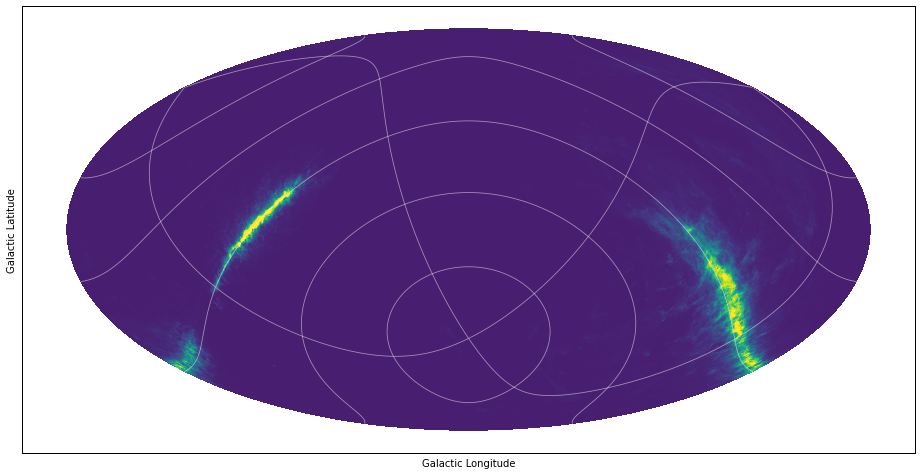

/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: All-NaN slice encountered
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: All-NaN slice encountered
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:123: RuntimeWarning: All-NaN slice encountered
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:163: RuntimeWarning: All-NaN slice encountered
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:203: RuntimeWarning: All-NaN slice encountered
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:243: RuntimeWarning: All-NaN slice encountered


V2_p0_p0.fits
INFO: Auto-setting vmin to -1.237e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.366e+03 [aplpy.core]


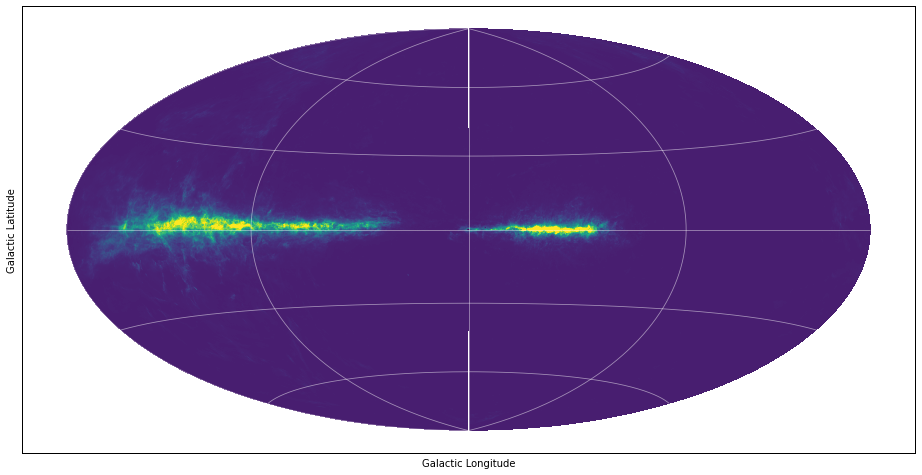

V2_p120_p0.fits
INFO: Auto-setting vmin to -1.347e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.487e+03 [aplpy.core]


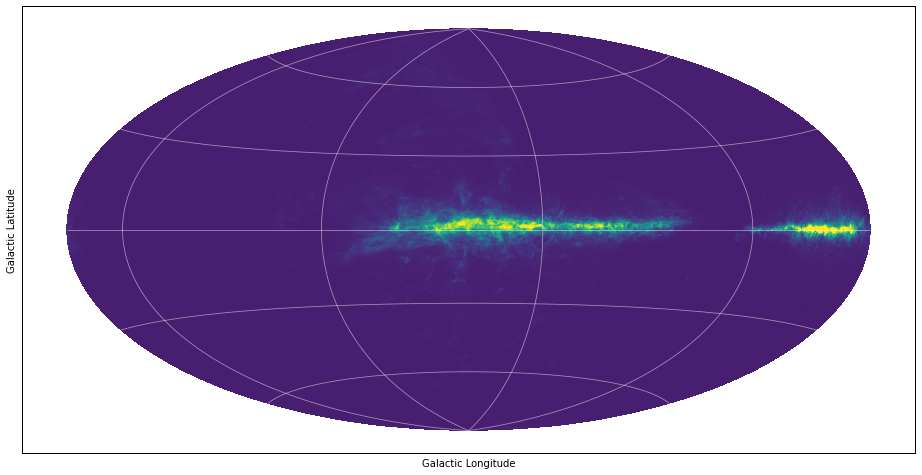

V2_m120_p45.fits
INFO: Auto-setting vmin to -1.177e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.299e+03 [aplpy.core]


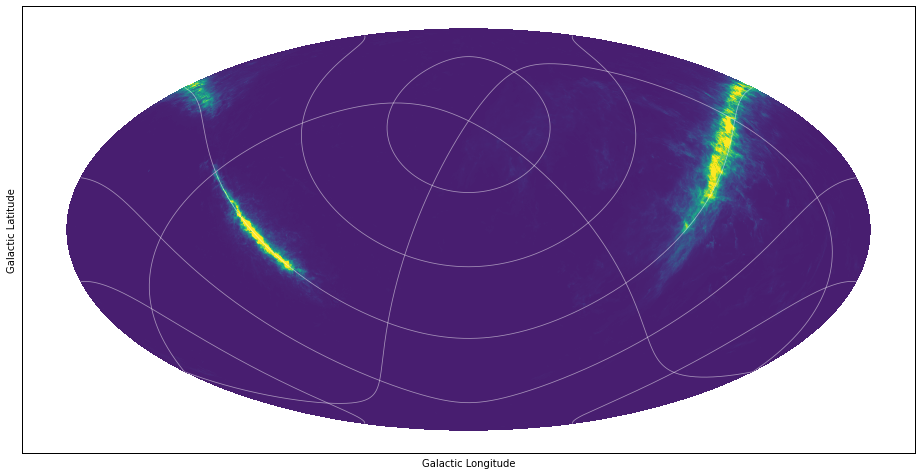

/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: All-NaN slice encountered
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: All-NaN slice encountered
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:123: RuntimeWarning: All-NaN slice encountered
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:163: RuntimeWarning: All-NaN slice encountered
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:203: RuntimeWarning: All-NaN slice encountered
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:243: RuntimeWarning: All-NaN slice encountered


V2_p120_m45.fits
INFO: Auto-setting vmin to -1.176e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.298e+03 [aplpy.core]


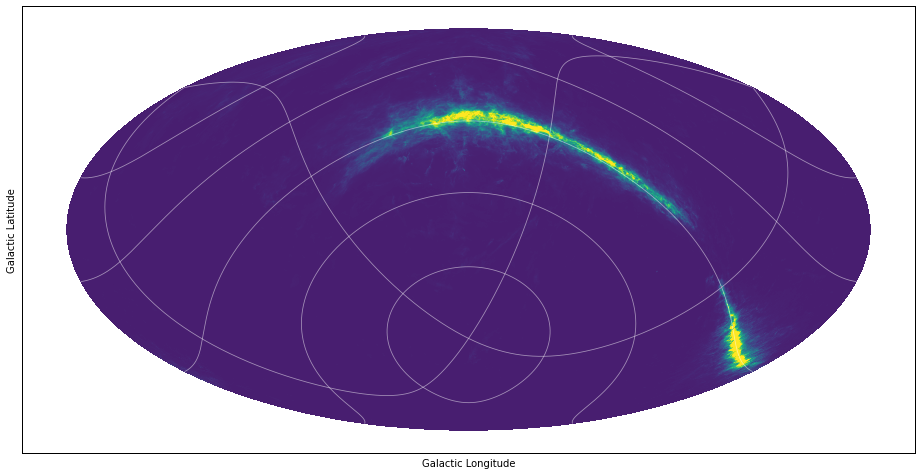

V2_p0_p45.fits
INFO: Auto-setting vmin to -1.299e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.434e+03 [aplpy.core]


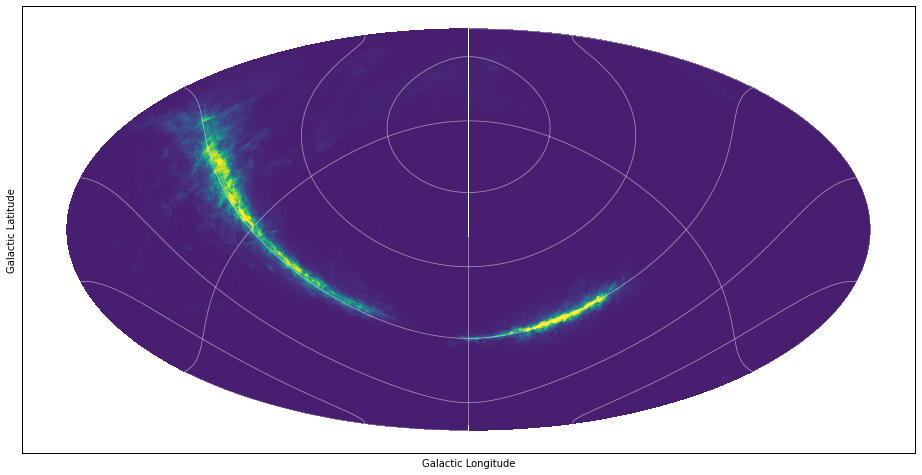

V2_p0_m45.fits
INFO: Auto-setting vmin to -1.236e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.364e+03 [aplpy.core]


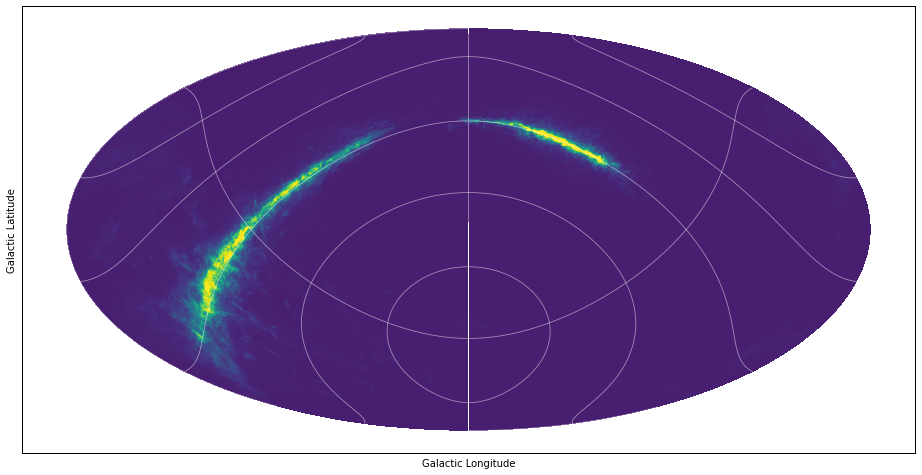

V2_m120_p0.fits
INFO: Auto-setting vmin to -1.185e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.308e+03 [aplpy.core]


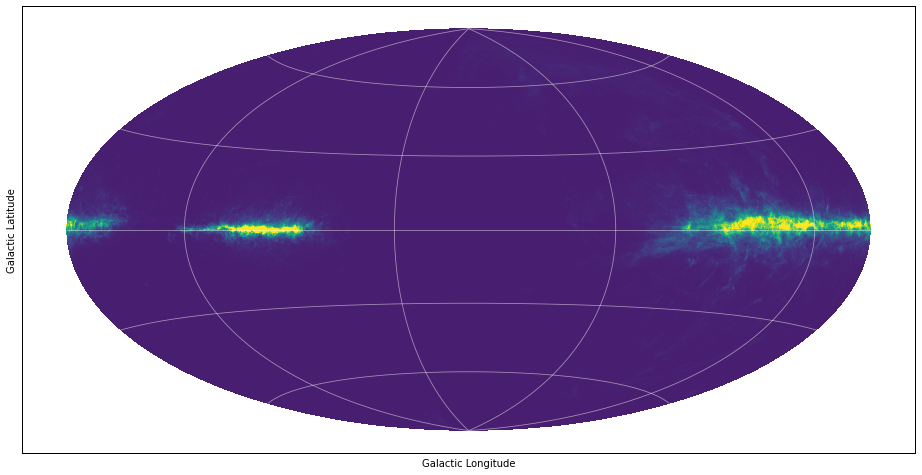

/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: All-NaN slice encountered
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: All-NaN slice encountered
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:123: RuntimeWarning: All-NaN slice encountered
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:163: RuntimeWarning: All-NaN slice encountered
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:203: RuntimeWarning: All-NaN slice encountered
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/ipykernel_launcher.py:243: RuntimeWarning: All-NaN slice encountered


V2_p120_p45.fits
INFO: Auto-setting vmin to -1.185e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.309e+03 [aplpy.core]


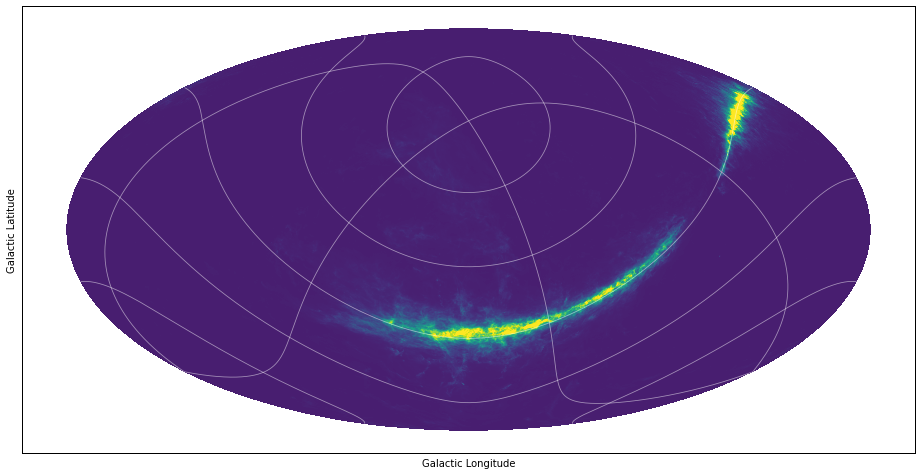

In [4]:
# files = glob.glob("/home/filament/Desktop/integ_fits_20220609/V2*.fits")
for path in files:
    d, bmaj = 10, 0.2706

    # fits_pwd = "test_1_-50_-30.fits"
    fits_pwd = path
    hdu = fits.open(fits_pwd)[0]
    hdr1 = hdu.header

    w = WCS(hdu)
    fits_name = fits_pwd.split("/")[5]
    
    print(fits_name)

    fig = plt.figure(figsize=(16,16))
    f = aplpy.FITSFigure(hdu,figure=fig)
    f.show_colorscale()
    f.add_grid()
    plt.show()


    #region1
    pa_deg_map_1 = np.zeros(hdu.data.shape)
    for i in range(hdu.data.shape[1]):
        for j in range(hdu.data.shape[0]):

            pos = w.wcs_pix2world(i, j, 0)
            if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                pa_deg_map_1[[j],[i]]=np.nan
                continue
            if pos[1] > 0:
                pa_deg_map_1[[j],[i]]=np.nan

            if (pos[1] <= 0):
                if (pos[0] <= 180) and (pos[0] >= 60):
                    pa_deg_map_1[[j],[i]] = hdu.data[[j],[i]]
                else:
                    pa_deg_map_1[[j],[i]] = np.nan
            if (pos[1] < -60):
                pa_deg_map_1[[j],[i]]=np.nan
    if np.isnan(np.nanmax(pa_deg_map_1))==True:
        #region1
        pa_deg_map_1 = np.zeros(hdu.data.shape)
        for i in range(hdu.data.shape[1]):
            for j in range(hdu.data.shape[0]):

                pos = w.wcs_pix2world(i, j, 0)
                if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                    pa_deg_map_1[[j],[i]]=np.nan
                    continue
                if pos[1] > 0:
                    pa_deg_map_1[[j],[i]]=np.nan

                if (pos[1] <= 0):
                    if (pos[0]+360 <= 180) and (pos[0]+360 >= 60):
                        pa_deg_map_1[[j],[i]] = hdu.data[[j],[i]]
                    else:
                        pa_deg_map_1[[j],[i]] = np.nan
                if (pos[1] < -60):
                    pa_deg_map_1[[j],[i]]=np.nan
                    
                    
    #region2
    pa_deg_map_2 = np.zeros(hdu.data.shape)
    for i in range(hdu.data.shape[1]):
        for j in range(hdu.data.shape[0]):

            pos = w.wcs_pix2world(i, j, 0)
            if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                pa_deg_map_2[[j],[i]]=np.nan
                continue
            if pos[1] > 0:
                pa_deg_map_2[[j],[i]]=np.nan

            if pos[1] <= 0:
                if (pos[0] <= 300) and (pos[0] >= 180):
                    pa_deg_map_2[[j],[i]] = hdu.data[[j],[i]]
                else:
                    pa_deg_map_2[[j],[i]] = np.nan
            if (pos[1] < -60):
                pa_deg_map_2[[j],[i]]=np.nan

    if np.isnan(np.nanmax(pa_deg_map_2)) == True:
        pa_deg_map_2 = np.zeros(hdu.data.shape)
        for i in range(hdu.data.shape[1]):
            for j in range(hdu.data.shape[0]):

                pos = w.wcs_pix2world(i, j, 0)
                if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                    pa_deg_map_2[[j],[i]]=np.nan
                    continue
                if pos[1] > 0:
                    pa_deg_map_2[[j],[i]]=np.nan

                if pos[1] <= 0:
                    if (pos[0] +360 <= 300) and (pos[0] +360 >= 180):
                        pa_deg_map_2[[j],[i]] = hdu.data[[j],[i]]
                    else:
                        pa_deg_map_2[[j],[i]] = np.nan
                if (pos[1] < -60):
                    pa_deg_map_2[[j],[i]]=np.nan

    #region3
    pa_deg_map_3 = np.zeros(hdu.data.shape)
    for i in range(hdu.data.shape[1]):
        for j in range(hdu.data.shape[0]):

            pos = w.wcs_pix2world(i, j, 0)
            if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                pa_deg_map_3[[j],[i]]=np.nan
                continue
            if pos[1] < 0:
                pa_deg_map_3[[j],[i]]=np.nan

            if pos[1] >= 0:
                if (pos[0] <= 180) and (pos[0] >= 60):
                    pa_deg_map_3[[j],[i]] = hdu.data[[j],[i]]
                else:
                    pa_deg_map_3[[j],[i]] = np.nan
            if pos[1] > 60:
                pa_deg_map_3[[j],[i]] = np.nan

    if np.isnan(np.nanmax(pa_deg_map_3)) == True:
        pa_deg_map_3 = np.zeros(hdu.data.shape)
        for i in range(hdu.data.shape[1]):
            for j in range(hdu.data.shape[0]):

                pos = w.wcs_pix2world(i, j, 0)
                if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                    pa_deg_map_3[[j],[i]]=np.nan
                    continue
                if pos[1] < 0:
                    pa_deg_map_3[[j],[i]]=np.nan

                if pos[1] >= 0:
                    if (pos[0] +360 <= 180) and (pos[0] +360 >= 60):
                        pa_deg_map_3[[j],[i]] = hdu.data[[j],[i]]
                    else:
                        pa_deg_map_3[[j],[i]] = np.nan
                if pos[1] > 60:
                    pa_deg_map_3[[j],[i]] = np.nan

    #region4
    pa_deg_map_4 = np.zeros(hdu.data.shape)
    for i in range(hdu.data.shape[1]):
        for j in range(hdu.data.shape[0]):

            pos = w.wcs_pix2world(i, j, 0)
            if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                pa_deg_map_4[[j],[i]]=np.nan
                continue
            if pos[1] < 0:
                pa_deg_map_4[[j],[i]]=np.nan

            if pos[1] >= 0:
                if (pos[0] <= 300) and (pos[0] >= 180):
                    pa_deg_map_4[[j],[i]] = hdu.data[[j],[i]]
                else:
                    pa_deg_map_4[[j],[i]] = np.nan
            if pos[1] > 60:
                pa_deg_map_4[[j],[i]] = np.nan

    if np.isnan(np.nanmax(pa_deg_map_4)) == True:
        pa_deg_map_4 = np.zeros(hdu.data.shape)
        for i in range(hdu.data.shape[1]):
            for j in range(hdu.data.shape[0]):

                pos = w.wcs_pix2world(i, j, 0)
                if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                    pa_deg_map_4[[j],[i]]=np.nan
                    continue
                if pos[1] < 0:
                    pa_deg_map_4[[j],[i]]=np.nan

                if pos[1] >= 0:
                    if (pos[0] +360 <= 300) and (pos[0] +360 >= 180):
                        pa_deg_map_4[[j],[i]] = hdu.data[[j],[i]]
                    else:
                        pa_deg_map_4[[j],[i]] = np.nan
                if pos[1] > 60:
                    pa_deg_map_4[[j],[i]] = np.nan

    #region5
    pa_deg_map_5 = np.zeros(hdu.data.shape)
    for i in range(hdu.data.shape[1]):
        for j in range(hdu.data.shape[0]):

            pos = w.wcs_pix2world(i, j, 0)
            if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                pa_deg_map_5[[j],[i]]=np.nan
                continue
            if pos[1] > 0:
                pa_deg_map_5[[j],[i]]=np.nan

            if pos[1] <= 0:
                if ((pos[0] <= 60) and (pos[0] >= 0)) or ((pos[0] >= 300) and (pos[0] <= 360)):
                    pa_deg_map_5[[j],[i]] = hdu.data[[j],[i]]
                else:
                    pa_deg_map_5[[j],[i]] = np.nan
            if (pos[1] < -60):
                pa_deg_map_5[[j],[i]]=np.nan

    if np.isnan(np.nanmax(pa_deg_map_5)) == True:
        pa_deg_map_5 = np.zeros(hdu.data.shape)
        for i in range(hdu.data.shape[1]):
            for j in range(hdu.data.shape[0]):

                pos = w.wcs_pix2world(i, j, 0)
                if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                    pa_deg_map_5[[j],[i]]=np.nan
                    continue
                if pos[1] > 0:
                    pa_deg_map_5[[j],[i]]=np.nan

                if pos[1] <= 0:
                    if ((pos[0] +360 <= 60) and (pos[0] +360 >= 0)) or ((pos[0] +360 >= 300) and (pos[0] +360 <= 360)):
                        pa_deg_map_5[[j],[i]] = hdu.data[[j],[i]]
                    else:
                        pa_deg_map_5[[j],[i]] = np.nan
                if (pos[1] < -60):
                    pa_deg_map_5[[j],[i]]=np.nan

    #region6
    pa_deg_map_6 = np.zeros(hdu.data.shape)
    for i in range(hdu.data.shape[1]):
        for j in range(hdu.data.shape[0]):

            pos = w.wcs_pix2world(i, j, 0)
            if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                pa_deg_map_6[[j],[i]]=np.nan
                continue
            if pos[1] < 0:
                pa_deg_map_6[[j],[i]]=np.nan

            if pos[1] >= 0:
                if ((pos[0] <= 60) and (pos[0] >= 0)) or ((pos[0] >= 300) and (pos[0] <= 360)):
                    pa_deg_map_6[[j],[i]] = hdu.data[[j],[i]]
                else:
                    pa_deg_map_6[[j],[i]] = np.nan
            if pos[1] > 60:
                pa_deg_map_6[[j],[i]] = np.nan

    if np.isnan(np.nanmax(pa_deg_map_6)) == True:
        pa_deg_map_6 = np.zeros(hdu.data.shape)
        for i in range(hdu.data.shape[1]):
            for j in range(hdu.data.shape[0]):

                pos = w.wcs_pix2world(i, j, 0)
                if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
                    pa_deg_map_6[[j],[i]]=np.nan
                    continue
                if pos[1] < 0:
                    pa_deg_map_6[[j],[i]]=np.nan

                if pos[1] >= 0:
                    if ((pos[0] +360 <= 60) and (pos[0] +360 >= 0)) or ((pos[0] +360 >= 300) and (pos[0] +360 <= 360)):
                        pa_deg_map_6[[j],[i]] = hdu.data[[j],[i]]
                    else:
                        pa_deg_map_6[[j],[i]] = np.nan
                if pos[1] > 60:
                    pa_deg_map_6[[j],[i]] = np.nan

    region1 = fits.PrimaryHDU(pa_deg_map_1.astype('float32'),hdu.header)

    region2 = fits.PrimaryHDU(pa_deg_map_2.astype('float32'),hdu.header)

    region3 = fits.PrimaryHDU(pa_deg_map_3.astype('float32'),hdu.header)

    region4 = fits.PrimaryHDU(pa_deg_map_4.astype('float32'),hdu.header)

    region5 = fits.PrimaryHDU(pa_deg_map_5.astype('float32'),hdu.header)

    region6 = fits.PrimaryHDU(pa_deg_map_6.astype('float32'),hdu.header)

    region1.writeto("/home/filament/Desktop/fil_result/integ_fits/region1/region1_"+fits_name,overwrite=True)
    region2.writeto("/home/filament/Desktop/fil_result/integ_fits/region2/region2_"+fits_name,overwrite=True)
    region3.writeto("/home/filament/Desktop/fil_result/integ_fits/region3/region3_"+fits_name,overwrite=True)
    region4.writeto("/home/filament/Desktop/fil_result/integ_fits/region4/region4_"+fits_name,overwrite=True)
    region5.writeto("/home/filament/Desktop/fil_result/integ_fits/region5/region5_"+fits_name,overwrite=True)
    region6.writeto("/home/filament/Desktop/fil_result/integ_fits/region6/region6_"+fits_name,overwrite=True)